In [1]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

### Leitura do arquivo

No Firebase os dados encontram-se ordenados como estruturas aninhadas. Vamos usar a função Export JSON no Firebase console.

<img src=firebase_object_tree_elapsed.png width=200>


A função *Exportar o JSON* fica à direita na visão de base de dados:
<img src=export_json.png width=500>

In [2]:
arquivo = open("teste-ab-export-elapsed.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

### Análise dos atributos

 Vamos explorar os atributos armazenados neste JSON:

In [3]:
for k,v in dados_fire.items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        #print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

### Convertendo para um dataframe

O pandas entende listas de dicionários que têm as mesmas chaves. O Firebase nos dá dicionários de dicionários de dicionários. 

Vamos precisar converter. Basta inserir todos os itens em uma lista

In [4]:
lista_dicionarios = []

for k,v in dados_fire.items():
    lista_dicionarios.append(v)

In [5]:
lista_dicionarios[:3]

[{'elapsed': 810,
  'filename': 'Mobile2_a.html',
  'id': '92a17e171a57d46920948059160a5db7'},
 {'elapsed': 1705,
  'filename': 'Mobile2_a.html',
  'id': '92a17e171a57d46920948059160a5db7'},
 {'elapsed': 1278,
  'filename': 'Mobile2_b.html',
  'id': '92a17e171a57d46920948059160a5db7'}]

A função `from_records` converte a lista de dicionários em um dataframe

In [6]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [7]:
dataframe.sort_values(by=['id', 'filename', 'elapsed']).head(10)

,elapsed,filename,id
8,2827,Mobile2_b.html,078a6762c757e362371cef08074cb331
9,3462,Mobile2_b.html,078a6762c757e362371cef08074cb331
54,2592,Mobile2_a.html,257d2e13a3beb798e68445124f594a1d
52,2801,Mobile2_a.html,257d2e13a3beb798e68445124f594a1d
11,2934,Mobile2_a.html,257d2e13a3beb798e68445124f594a1d
53,6213,Mobile2_a.html,257d2e13a3beb798e68445124f594a1d
51,9568,Mobile2_a.html,257d2e13a3beb798e68445124f594a1d
10,3064,Mobile2_b.html,257d2e13a3beb798e68445124f594a1d
18,1114,Mobile2_a.html,61258ebef70b2ab4d8430cd305f6f28a
49,1714,Mobile2_a.html,61258ebef70b2ab4d8430cd305f6f28a


# Comparação dos histogramas

(array([15.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1238. ,  29274.6,  57311.2,  85347.8, 113384.4, 141421. ,
        169457.6, 197494.2, 225530.8, 253567.4, 281604. ]),
 <a list of 10 Patch objects>)

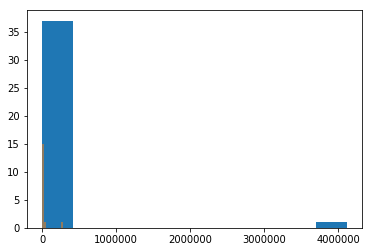

In [8]:
tempos_A = list(dataframe[dataframe.filename=="Mobile2_a.html"].elapsed)
tempos_B = list(dataframe[dataframe.filename=="Mobile2_b.html"].elapsed)
plt.hist(tempos_A, bins=10)
plt.hist(tempos_B, bins=10, alpha=0.5)